In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_brazil = pd.read_excel(r'alldatasets.xlsx',sheet_name='Brazil')

In [3]:
df_brazil.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn_usd
0,BR0,Brazil,180.65,0.0,13.0,1.510429,7.0,8.0,1.0,47.0,4.0,0.882373,3.0,0.0,707.225360
1,BR1,Brazil,180.35,0.0,16.0,0.399053,0.0,5.0,1.0,50.0,3.0,0.306352,3.0,1.0,290.316010
2,BR2,Brazil,164.95,0.0,15.0,0.002132,NaN,5.0,0.0,52.0,3.0,0.533106,3.0,1.0,109.973544
3,BR3,Brazil,182.30,0.0,4.0,-1.823701,NaN,9.0,1.0,49.0,8.0,0.777917,NaN,NaN,0.000000
4,BR4,Brazil,NaN,NaN,NaN,NaN,NaN,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_brazil.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1', 'hhsizer1',
       'wi_newr1', 'job_cat', 'pvt_sector', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

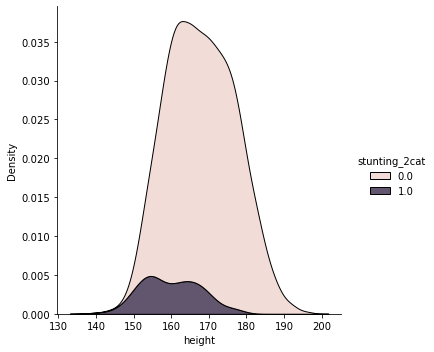

In [6]:
import seaborn as sns
sns.displot(df_brazil, x="height", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_brazil[['height']]
X = df_brazil[['stunting_2cat']]

In [8]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=168.7, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=7.8)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_brazil, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 20 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,168.693,0.167,168.375,168.991,0.002,0.002,5943.0,5942.0,5939.0,3565.0,1.0
stunting_2cat,-8.786,0.515,-9.707,-7.819,0.007,0.005,6046.0,6046.0,6041.0,4531.0,1.0
sd,8.741,0.112,8.542,8.955,0.001,0.001,6227.0,6227.0,6234.0,4070.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

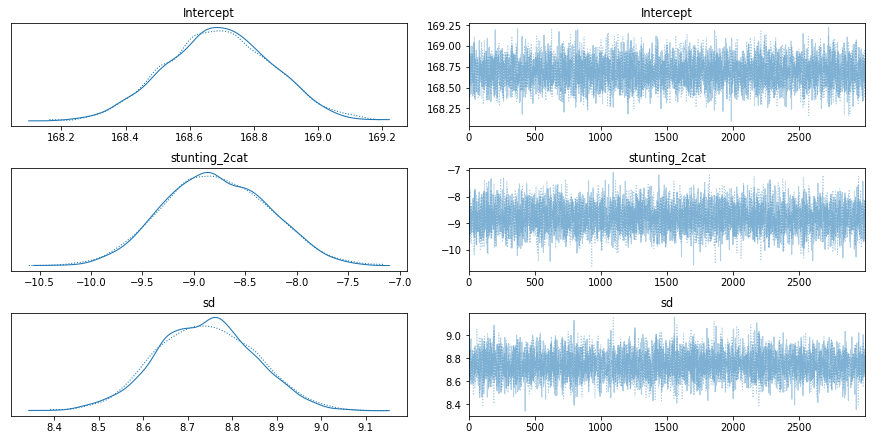

In [12]:
az.plot_trace(normal_trace)

In [13]:
Y = df_brazil['height']
X = df_brazil[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [14]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=168.7, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=7.8),
        'agegapr1': pm.Normal.dist(mu=1, sigma=7.8),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=7.8),
        'chsexr1': pm.Normal.dist(mu=1, sigma=7.8),
        'agemonr1': pm.Normal.dist(mu=1, sigma=7.8),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=7.8),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=7.8) 
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_brazil, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=5000, chains = 2, tune = 8000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 8_000 tune and 5_000 draw iterations (16_000 + 10_000 draws total) took 111 seconds.


In [22]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,161.176,1.482,158.327,163.869,0.021,0.015,5132.0,5124.0,5141.0,5552.0,1.0
stunting_2cat,-8.528,0.424,-9.339,-7.747,0.004,0.003,11189.0,11189.0,11215.0,6789.0,1.0
agegapr1,-0.026,0.031,-0.080,0.034,0.000,0.000,10857.0,6819.0,10864.0,7438.0,1.0
momeduyrsr1,0.142,0.034,0.079,0.210,0.000,0.000,6541.0,6492.0,6536.0,7340.0,1.0
chsexr1,13.048,0.246,12.579,13.511,0.003,0.002,8023.0,8023.0,8051.0,6540.0,1.0
agemonr1,-0.006,0.033,-0.066,0.057,0.000,0.000,5337.0,5042.0,5338.0,5978.0,1.0
wi_newr1,0.830,0.802,-0.690,2.327,0.010,0.007,6179.0,6018.0,6183.0,6682.0,1.0
hhsizer1,0.049,0.072,-0.085,0.184,0.001,0.001,8604.0,6697.0,8608.0,7349.0,1.0
sd,5.849,0.085,5.687,6.006,0.001,0.001,8391.0,8391.0,8378.0,6890.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

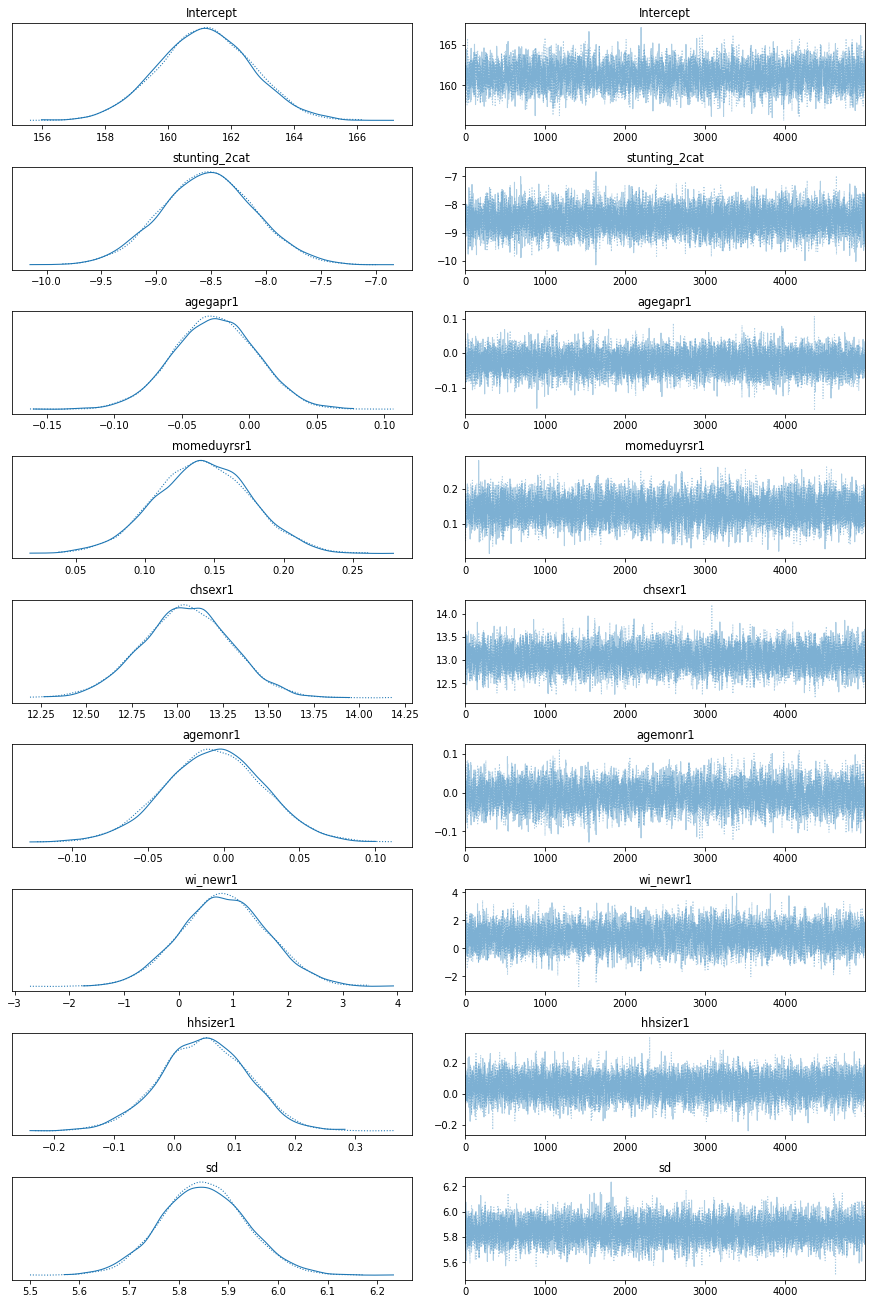

In [23]:
az.plot_trace(normal_trace)

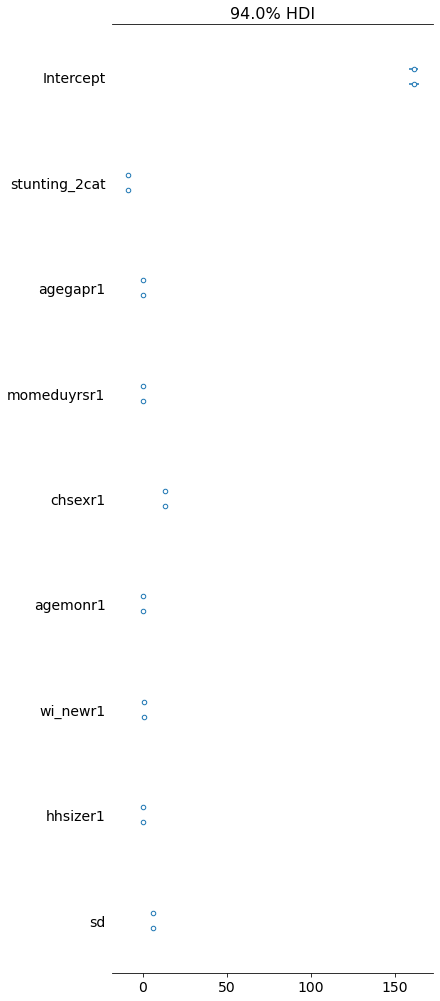

In [24]:
az.plot_forest(normal_trace);